# installing - pycaret - library

In [1]:
#!pip install pycaret --use-feature=2020-resolver

# importing necessary libraries

In [2]:
import numpy as np
import pandas as pd
from pycaret.classification import *

# reading necessary datasets

In [3]:
train = pd.read_csv("train (3).csv")
test = pd.read_csv("test (1).csv")

In [4]:
train.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S


In [5]:
train.shape

(891, 12)

In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# training the models

In [7]:
clf_1 = setup(data = train,
             target = 'Survived',
             numeric_imputation = 'mean',
             categorical_features = ['Sex', 'Embarked'] ,
             ignore_features = ['Name', 'Ticket', 'Cabin'],
             silent = True)

,Description,Value
0,session_id,5185
1,Target,Survived
2,Target Type,Binary
3,Label Encoded,None
4,Original Data,"(891, 12)"
5,Missing Values,True
6,Numeric Features,3
7,Categorical Features,5
8,Ordinal Features,False
9,High Cardinality Features,False


# comparing models

In [8]:
compare_models()

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
lightgbm,Light Gradient Boosting Machine,0.8121,0.8564,0.6957,0.7653,0.7261,0.5840,0.5877,0.1440
gbc,Gradient Boosting Classifier,0.8105,0.8666,0.6421,0.7902,0.7063,0.5693,0.5773,0.0680
ridge,Ridge Classifier,0.8009,0.0000,0.6646,0.7539,0.7033,0.5550,0.5596,0.0050
lda,Linear Discriminant Analysis,0.7993,0.8295,0.6646,0.7513,0.7019,0.5520,0.5568,0.0090
lr,Logistic Regression,0.7992,0.8359,0.6644,0.7515,0.7014,0.5516,0.5570,0.6500
xgboost,Extreme Gradient Boosting,0.7944,0.8420,0.6826,0.7297,0.7009,0.5456,0.5494,0.4340
ada,Ada Boost Classifier,0.7913,0.8269,0.6781,0.7264,0.7005,0.5406,0.5422,0.0720
rf,Random Forest Classifier,0.7703,0.8475,0.6638,0.6879,0.6721,0.4960,0.4987,0.1740
et,Extra Trees Classifier,0.7686,0.8056,0.6462,0.6930,0.6634,0.4886,0.4933,0.1540
dt,Decision Tree Classifier,0.7574,0.7347,0.6557,0.6692,0.6600,0.4720,0.4741,0.0050


LGBMClassifier(boosting_type='gbdt', class_weight=None, colsample_bytree=1.0,
               importance_type='split', learning_rate=0.1, max_depth=-1,
               min_child_samples=20, min_child_weight=0.001, min_split_gain=0.0,
               n_estimators=100, n_jobs=-1, num_leaves=31, objective=None,
               random_state=5185, reg_alpha=0.0, reg_lambda=0.0, silent=True,
               subsample=1.0, subsample_for_bin=200000, subsample_freq=0)

# creating model

In [9]:
lgbm  = create_model('lightgbm')  

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8254,0.9261,0.7391,0.7727,0.7556,0.6199,0.6202
1,0.8413,0.9022,0.7826,0.7826,0.7826,0.6576,0.6576
2,0.8095,0.8674,0.6957,0.7619,0.7273,0.5814,0.5828
3,0.8065,0.8625,0.6364,0.7778,0.7000,0.5592,0.5654
4,0.7903,0.7386,0.5455,0.8000,0.6486,0.5067,0.5256
5,0.8548,0.9170,0.7727,0.8095,0.7907,0.6797,0.6801
6,0.7903,0.8068,0.6364,0.7368,0.6829,0.5275,0.5307
7,0.7258,0.7773,0.6818,0.6000,0.6383,0.4190,0.4212
8,0.8226,0.8841,0.7273,0.7619,0.7442,0.6085,0.6089
9,0.8548,0.8818,0.7391,0.8500,0.7907,0.6804,0.6843


# model tuning

In [10]:
tuned_lightgbm = tune_model(lgbm)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8413,0.9326,0.7391,0.8095,0.7727,0.6512,0.6528
1,0.8095,0.9011,0.6522,0.7895,0.7143,0.5734,0.5793
2,0.8571,0.8957,0.6957,0.8889,0.7805,0.6769,0.6881
3,0.8226,0.8818,0.6818,0.7895,0.7317,0.6002,0.6038
4,0.7581,0.6966,0.5000,0.7333,0.5946,0.4308,0.4469
5,0.8387,0.9375,0.7727,0.7727,0.7727,0.6477,0.6477
6,0.7903,0.8574,0.5909,0.7647,0.6667,0.5174,0.5265
7,0.7581,0.7795,0.6818,0.6522,0.6667,0.4769,0.4772
8,0.8548,0.8989,0.7727,0.8095,0.7907,0.6797,0.6801
9,0.8387,0.8506,0.7391,0.8095,0.7727,0.6481,0.6497


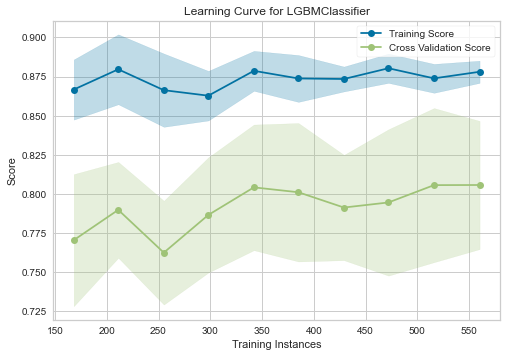

In [11]:
plot_model(estimator = tuned_lightgbm, plot = 'learning')

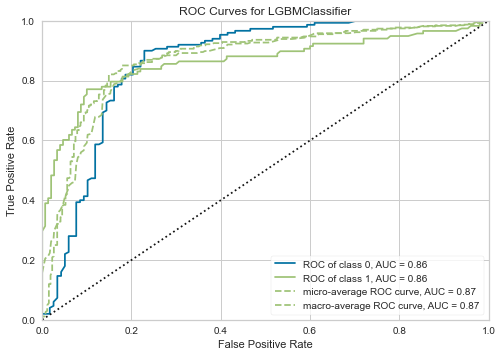

In [12]:
plot_model(estimator = tuned_lightgbm, plot = 'auc')

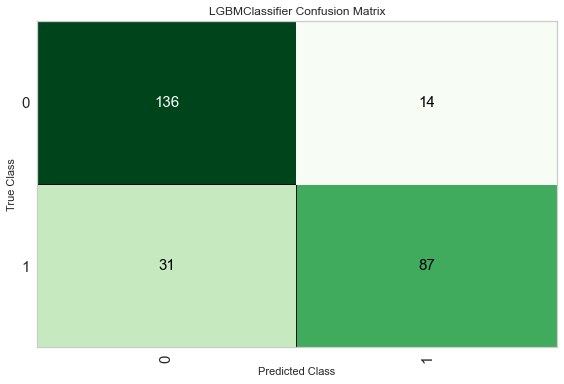

In [13]:
plot_model(estimator = tuned_lightgbm, plot = 'confusion_matrix')

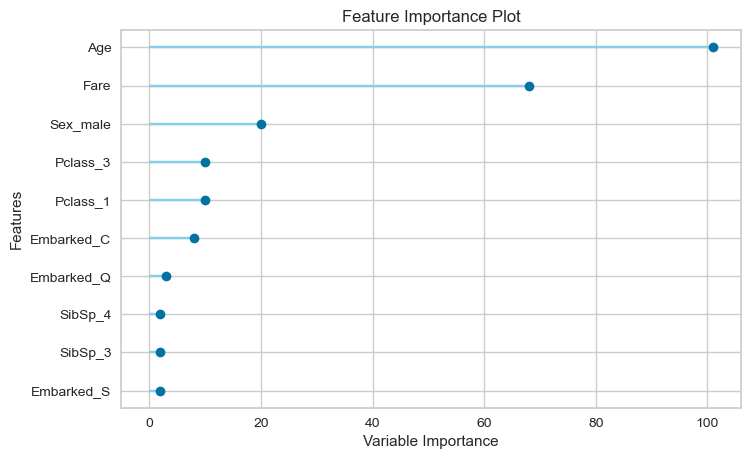

In [14]:
plot_model(estimator = tuned_lightgbm, plot = 'feature')

In [15]:
evaluate_model(tuned_lightgbm)

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Hyperparameters', 'param…

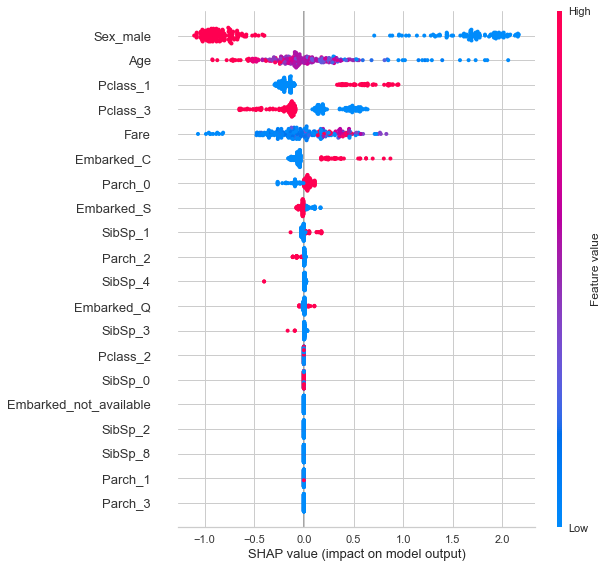

In [16]:
interpret_model(tuned_lightgbm)

# prediction

In [17]:
predict_model(tuned_lightgbm, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9083
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.7703
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9456
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8109
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.7042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.8483
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9330
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9475
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.8483


In [18]:
predictions = predict_model(tuned_lightgbm, data=test)
predictions.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9083
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.7703
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9456
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8109
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.7042


### additional

In [19]:
logr  = create_model('lr');      
xgb   = create_model('xgboost');            

#blending 3 models
blend = blend_models(estimator_list=[tuned_lightgbm,logr,xgb])

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,0.8571,0.9315,0.7826,0.8182,0.8000,0.6890,0.6894
1,0.8413,0.9022,0.7391,0.8095,0.7727,0.6512,0.6528
2,0.8413,0.8870,0.6957,0.8421,0.7619,0.6445,0.6511
3,0.8226,0.8761,0.6818,0.7895,0.7317,0.6002,0.6038
4,0.8065,0.7341,0.5455,0.8571,0.6667,0.5396,0.5670
5,0.8710,0.9364,0.8182,0.8182,0.8182,0.7182,0.7182
6,0.7903,0.8205,0.5909,0.7647,0.6667,0.5174,0.5265
7,0.7419,0.7580,0.6818,0.6250,0.6522,0.4477,0.4487
8,0.8387,0.8920,0.7273,0.8000,0.7619,0.6404,0.6420
9,0.8387,0.8818,0.7391,0.8095,0.7727,0.6481,0.6497


penggabungan model memungkinkan akan meningkatkan akurasi model

# saving model

In [20]:
save_model(tuned_lightgbm, 'classify')

Transformation Pipeline and Model Successfully Saved


(Pipeline(memory=None,
          steps=[('dtypes',
                  DataTypes_Auto_infer(categorical_features=['Sex', 'Embarked'],
                                       display_types=False,
                                       features_todrop=['Name', 'Ticket',
                                                        'Cabin'],
                                       id_columns=['PassengerId'],
                                       ml_usecase='classification',
                                       numerical_features=[], target='Survived',
                                       time_features=[])),
                 ('imputer',
                  Simple_Imputer(categorical_strategy='not_available',
                                 fill_value_c...
                                 boosting_type='gbdt', class_weight=None,
                                 colsample_bytree=1.0, feature_fraction=0.8,
                                 importance_type='split', learning_rate=0.15,
               

# loading the saved model

In [21]:
model_saved = load_model('classify')

Transformation Pipeline and Model Successfully Loaded


In [22]:
predict_model(model_saved, data=test)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Label,Score
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,0,0.9083
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,0,0.7703
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q,0,0.9456
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S,0,0.8109
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S,0,0.7042
...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S,0,0.8483
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C,1,0.9330
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S,0,0.9475
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S,0,0.8483
